In [1]:
import utilityFunctions as uf
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

C:\Users\gowda\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Loading Audio Signals

In [5]:
dirpath = r"D:\SER-RO-MAHA\Sample Speech Data"

neutral, sr = uf.return_audio_array('03-01-01-01-01-01-01.wav', dirpath, 'Neutral')
happy, _ = uf.return_audio_array('03-01-03-01-01-01-01.wav', dirpath, 'Happy')
sad, _ = uf.return_audio_array('03-01-04-01-01-01-01.wav', dirpath, 'Sad')
angry, _ = uf.return_audio_array('03-01-05-01-01-01-01.wav', dirpath, 'Anger')
fear, _ = uf.return_audio_array('03-01-06-01-01-01-01.wav', dirpath, 'Fear')
disgust, _ = uf.return_audio_array('03-01-07-01-01-01-01.wav', dirpath, 'Disgust')
surprise, _ = uf.return_audio_array('03-01-08-01-01-01-01.wav', dirpath, 'Surprise')

In [6]:
FRAME_SIZE = 1024
HOP_SIZE = 512

## Extracting STFT 
ie.. From Time Domain to Frequency Domain

In [7]:
stft = librosa.stft(neutral, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
type(stft[0][0])

numpy.complex64

### Spectogram Calculation

In [8]:
amplitude_spect = np.abs(stft) ** 2
amplitude_spect.shape

(513, 64)

### Visualizing Spectrogram

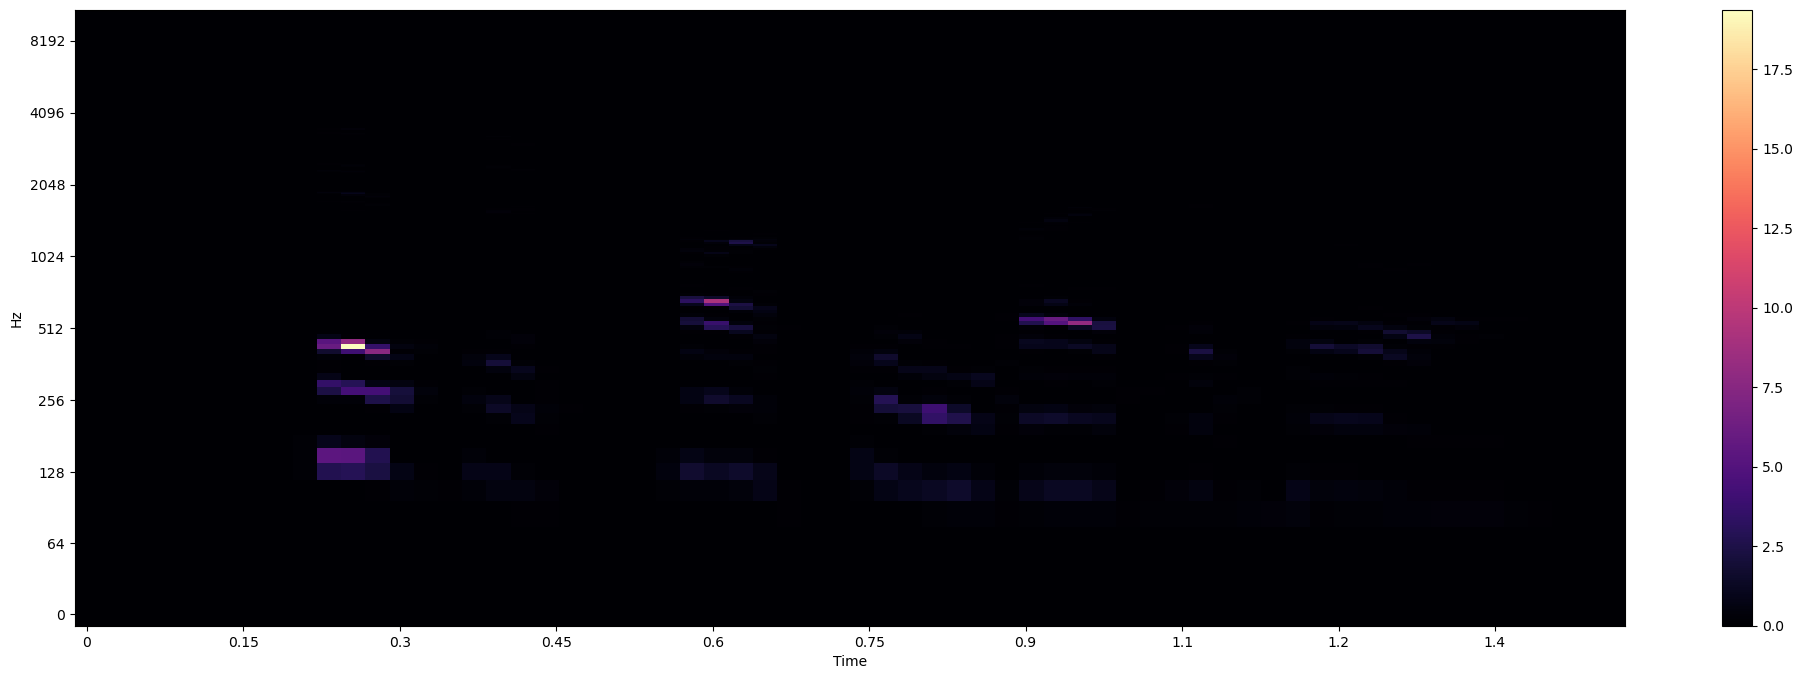

In [112]:
def plot_spectrogram(scale, sr, perception):
    plt.figure(figsize=(25, 8))
    librosa.display.specshow(scale, sr=sr, hop_length=HOP_SIZE, x_axis='time', y_axis=perception)
    plt.colorbar()
    
plot_spectrogram(amplitude_spect, sr, perception='log')

## Log-Amplitude Spectogram

In [113]:
log_amplitude = librosa.power_to_db(amplitude_spect)
log_amplitude.shape

(513, 64)

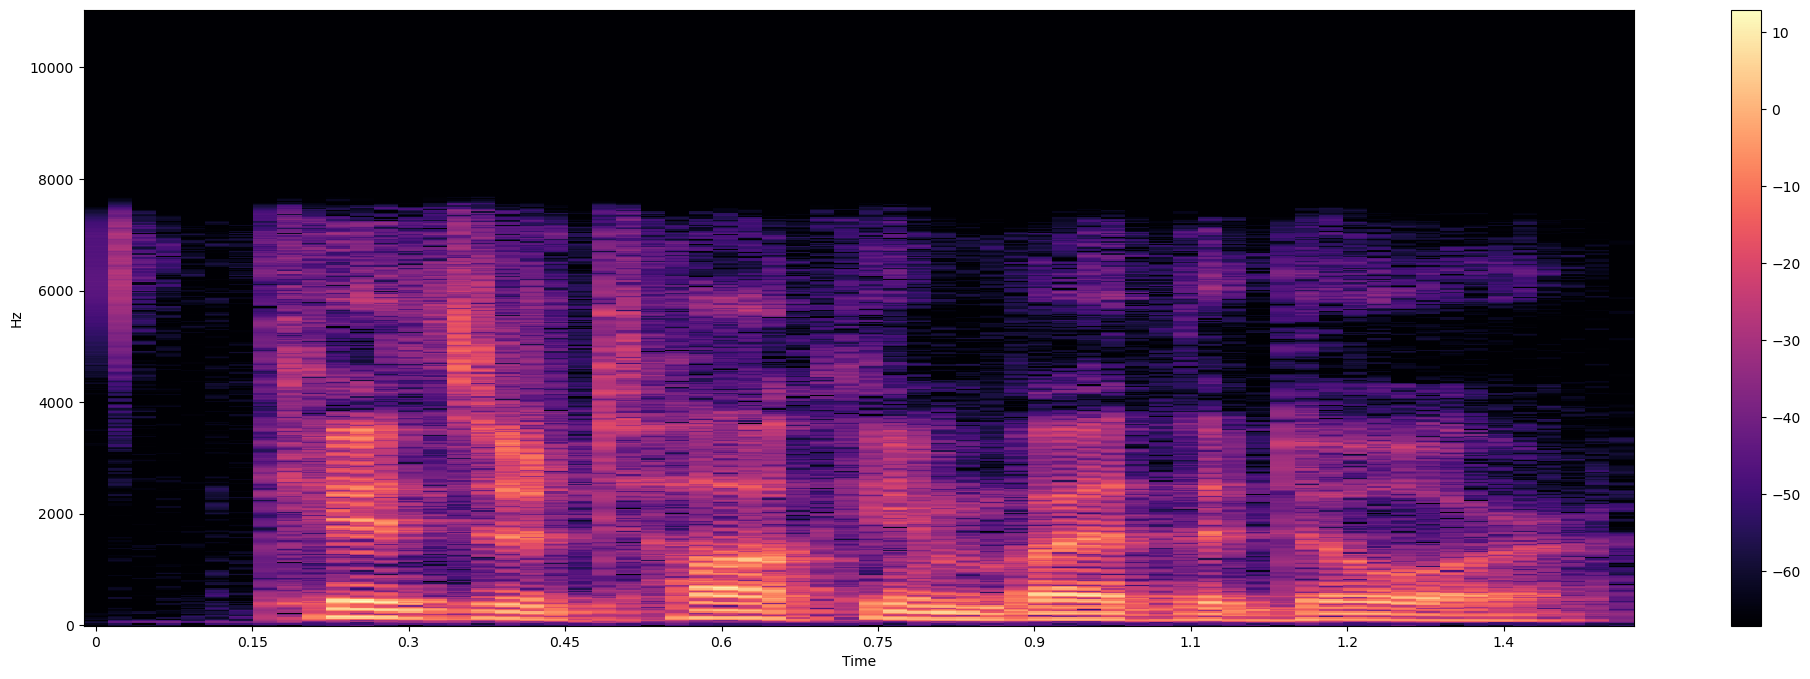

In [114]:
plot_spectrogram(log_amplitude, sr, perception='linear')

## Log-Frequency Spectogram

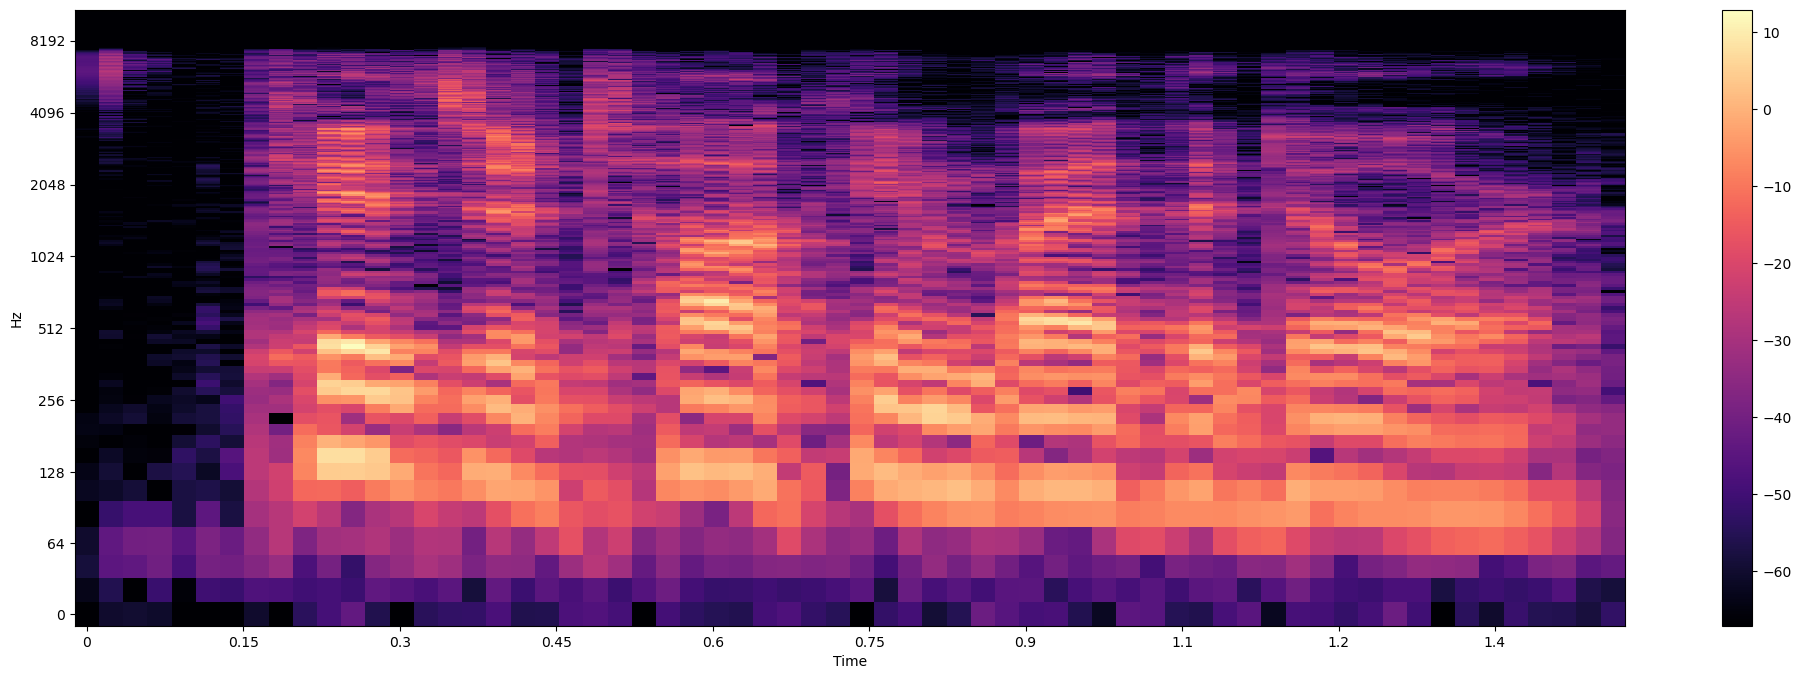

In [115]:
plot_spectrogram(log_amplitude, sr, perception='log')

In [149]:
def extract_spectogram(signal, sr):
    stft = librosa.stft(signal, n_fft=1024, hop_length=512)
    log_amplitude = librosa.power_to_db(np.abs(stft) ** 2)
    return log_amplitude

In [150]:
neutral = extract_spectogram(y, sr)
happy = extract_spectogram(y1, sr)
sad = extract_spectogram(y2, sr)

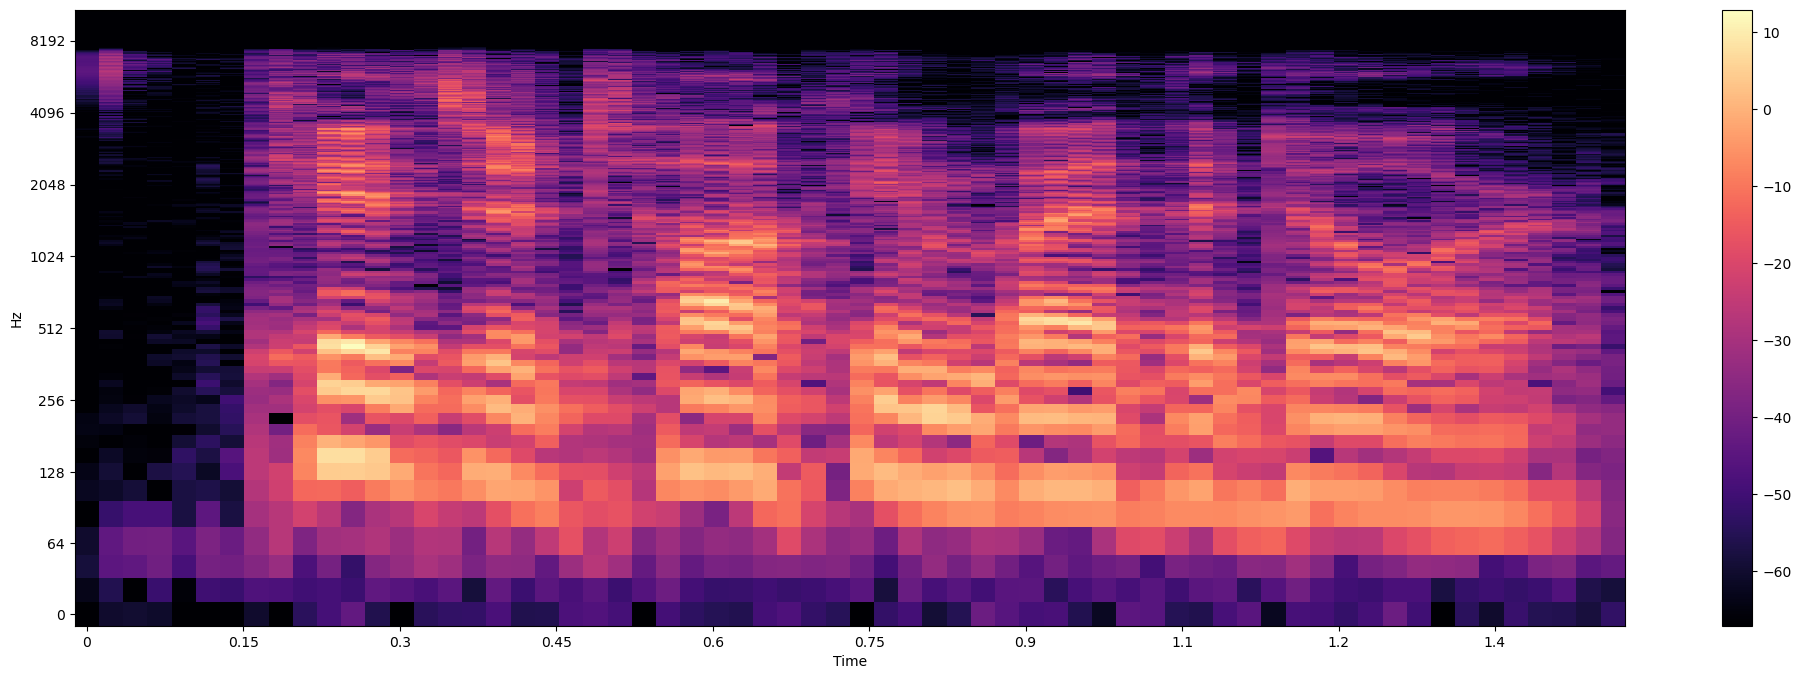

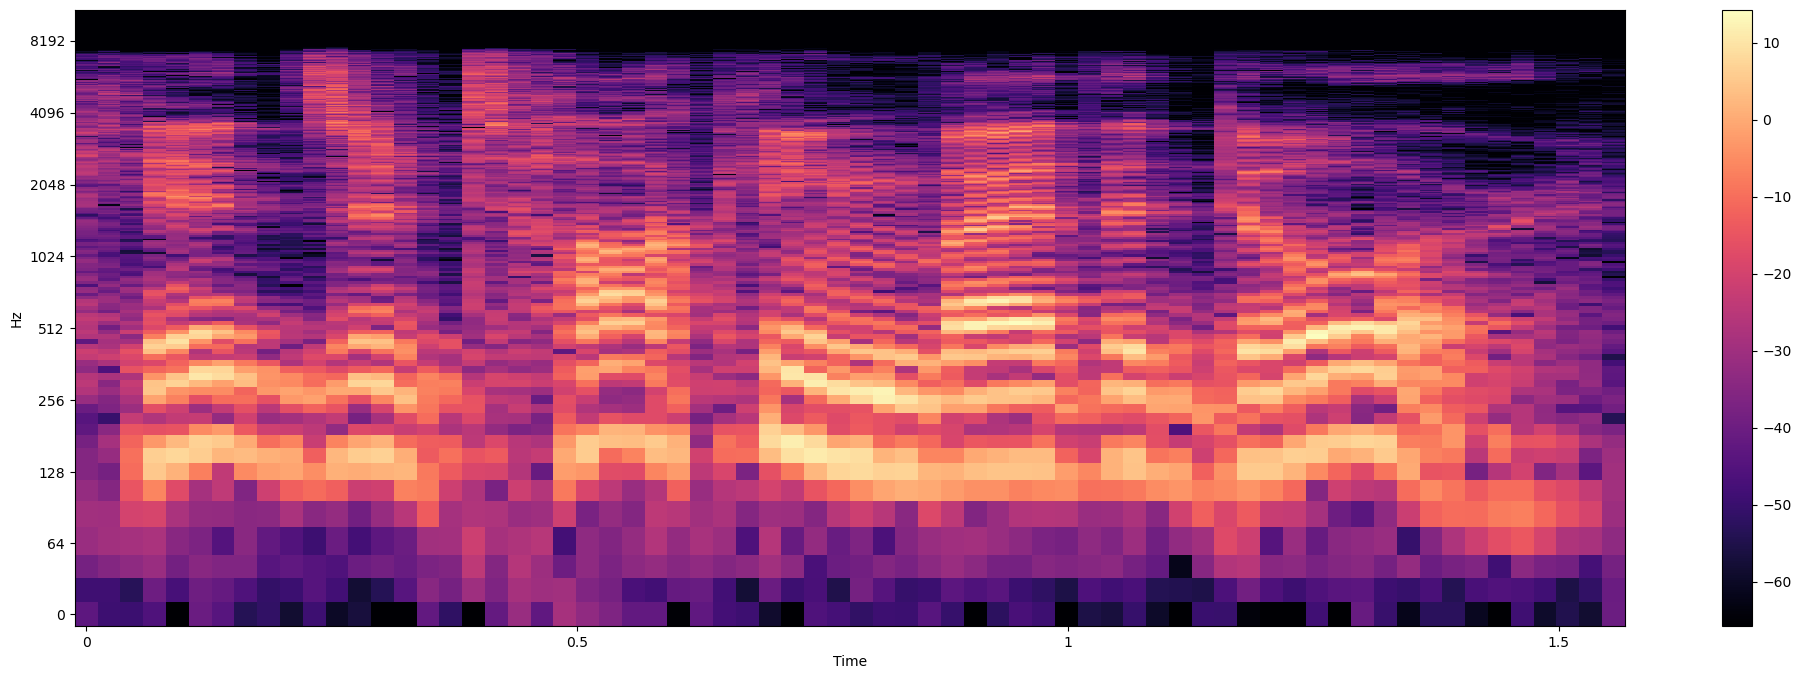

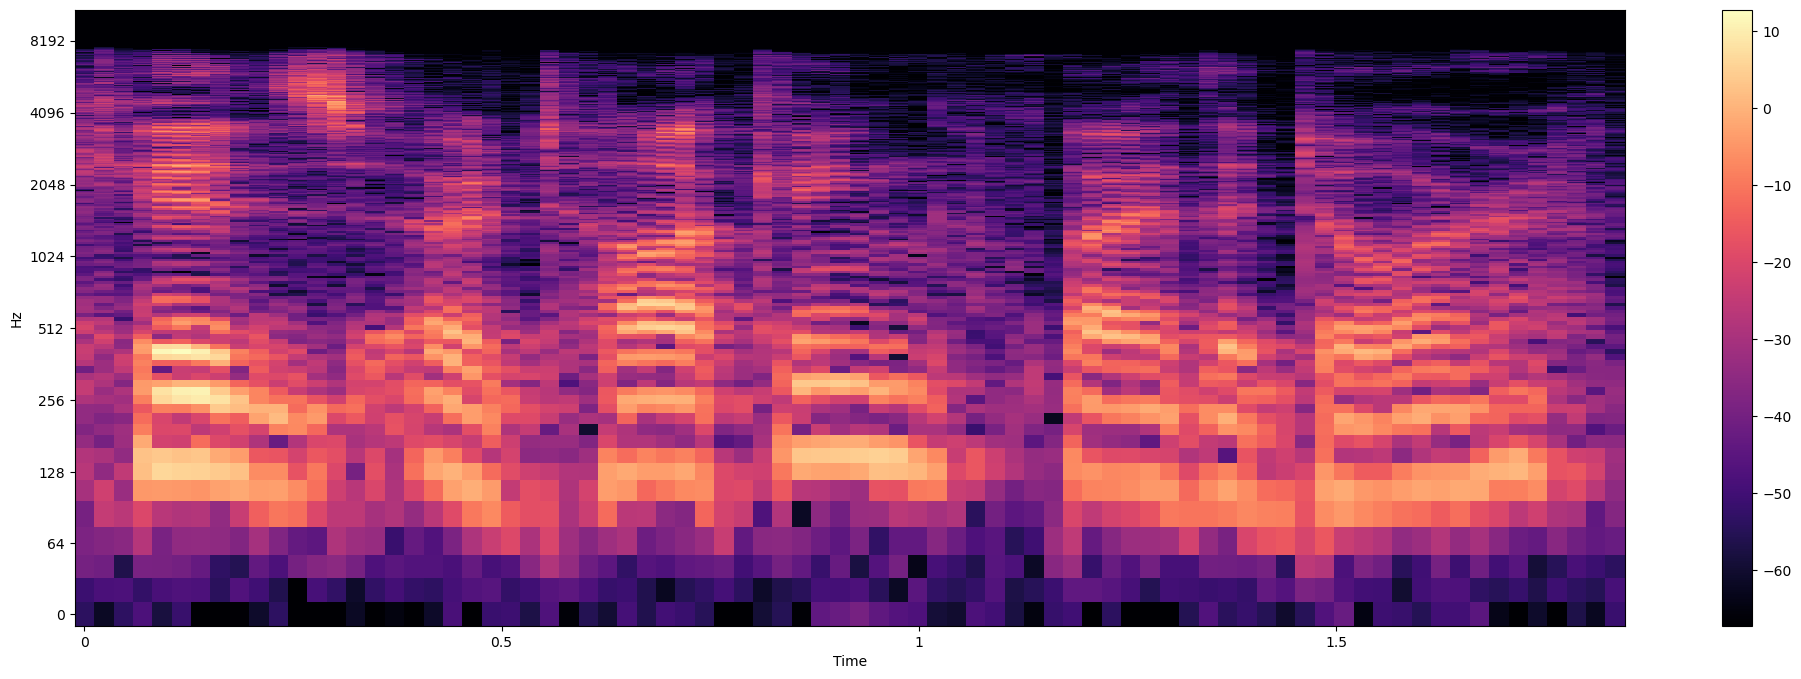

In [151]:
plot_spectrogram(neutral, sr, perception='log')
plot_spectrogram(happy, sr, perception='log')
plot_spectrogram(sad, sr, perception='log')